# CS 109A/STAT 121A/AC 209A/CSCI E-109A: Homework 4
# Regularization, High Dimensionality, PCA


**Harvard University**<br/>
**Fall 2017**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine

---

### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- Do not include your name(s) in the notebook even if you are submitting as a group. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 

---

Your partner's name (if you submit separately):

Enrollment Status (109A, 121A, 209A, or E109A):

Import libraries:

In [2170]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
from scipy.stats import t
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from statsmodels.tools import add_constant
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from scipy.optimize import minimize
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA

%matplotlib inline

# Continuing Bike Sharing Usage Data

In this homework, we will focus on multiple linear regression, regularization, dealing with high dimensionality, and PCA. We will continue to build regression models for the Capital Bikeshare program in Washington D.C.  See Homework 3 for more information about the data.

*Note: please make sure you use all the processed data from HW 3 Part (a)...you make want to save the data set on your computer and reread the csv/json file here.


In [1257]:
#load Bikeshare_train
dftrain=pd.read_csv("d:/Users/Home/Desktop/Open-U/Data Science/a-2017-master/HW/hw_3/Bikeshare_train.csv")
df_test=pd.read_csv("d:/Users/Home/Desktop/Open-U/Data Science/a-2017-master/HW/hw_3/Bikeshare_test.csv")
dftrain=dftrain.rename(columns={"Unnamed: 0":"name"})
dftrain = dftrain.drop('name', 1)
df_test=df_test.rename(columns={"Unnamed: 0":"name"})
df_test = df_test.drop('name', 1)
dftrain_oneH=dftrain
dftest_oneH=df_test


In [1258]:
cols = dftrain.columns.tolist()

In [1259]:
cols_1=['temp','atemp','humidity','windspeed']

In [1260]:
# nozmalization of the continuous predictors

def nozmalization(df,col_to_cod):
     for i in range(0, len(col_to_cod)):
        temp_mean=np.mean(df[col_to_cod[i]])
        temp_SD=np.std(df[col_to_cod[i]])
        df[col_to_cod[i]+'_new']=df[col_to_cod[i]].apply(lambda x:(x-temp_mean)/temp_SD) 
     return df

In [1261]:
dftrain_oneH=nozmalization(dftrain_oneH,cols_1)
#dftrain_oneH.head()


In [1262]:
#  one-hot encoding of categorical vars
#season
def one_hot(df,col_to_cod):
    for i in range(0, len(col_to_cod)):
        dummies_s= pd.get_dummies(df[col_to_cod[i]]).rename(columns=lambda x:col_to_cod[i]+ '_' + str(x))
        df= pd.concat([df, dummies_s], axis=1)
    return df  

In [1263]:
cols_2=['season','holiday','workingday','weather','month','day_of_week']

In [1264]:
dftrain_oneH=one_hot(dftrain_oneH,cols_2)
#dftrain_oneH.head()

In [1265]:
#test re-scale
dftest_oneH=nozmalization(dftest_oneH,cols_1)
dftest_oneH=one_hot(dftest_oneH,cols_2)
#dftest_oneH.head()



In [1266]:
#cols_f = dftrain_oneH.columns.tolist()
cols_f=[             # 'season_1.0',       
                       'season_2.0', 'season_3.0', 'season_4.0', 
                     # 'month_1.0',
                       'month_2.0', 'month_3.0', 'month_4.0', 'month_5.0', 'month_6.0', 'month_7.0',
                       'month_8.0', 'month_9.0', 'month_10.0', 'month_11.0', 'month_12.0',           
                     # 'holiday_0.0',
                       'holiday_1.0',     
                     # 'day_of_week_0.0',
                       'day_of_week_1.0', 'day_of_week_2.0', 'day_of_week_3.0','day_of_week_4.0',
                       'day_of_week_5.0', 'day_of_week_6.0',
                     # 'workingday_0.0',
                       'workingday_1.0', 
                       'weather_1.0', 'weather_2.0', 'weather_3.0',
                       'temp_new','atemp_new',  'humidity_new', 'windspeed_new',     
                       'count' 
        ] 


In [1267]:
#finilize orgganization
def finilize(df,col_f):
    df_f=df[col_f]
    return df_f

In [1268]:
df_train_f=finilize(dftrain_oneH,cols_f)
df_test_f=finilize(dftest_oneH,cols_f)


In [1269]:
def get_simp_reg(X_t, y_t):
    regression_m = LinearRegression(fit_intercept=True)
    regression_m.fit(X_t, y_t)
    X_t_c = add_constant(X_t)
    model = sm.OLS(y_t, X_t_c).fit()
    return model, regression_m

In [1270]:
X_train=df_train_f[cols_f[:28]].values
Y_train=df_train_f['count'].values

X_test=df_test_f[cols_f[:28]].values
Y_test=df_test_f['count'].values


In [1271]:
#the simple regression parameters with all the predictors
train_mod,reg_simple=get_simp_reg(X_train, Y_train)
#train_mod.summary()
print('R^2 of the Simle mult.reg.on the TRAIN set ',train_mod.rsquared)

R^2 of the Simle mult.reg.on the TRAIN set  0.562170009284


In [1272]:
r_2_test=r2_score(Y_test, reg_simple.predict(X_test))
print('R^2 of the Simle mult.reg.on the TEST set ',r_2_test)

R^2 of the Simle mult.reg.on the TEST set  0.256065659935


In [1273]:
#  train_validation_test split
X_train_t, X_val, y_train_t, y_val = train_test_split(X_train, Y_train, test_size=0.33, random_state=42)
var=df_train_f['temp_new'].values


In [1274]:
#  Gidge regression WITHOUT cros vallidation
lam = [ 1e-5,  1e-4,  1e-3, 1e-2, 1e-1,1, 1.0, 10.0, 1e2, 1e3, 1e4, 1e5 ]
train_R_sq = []
test_R_sq = []

def ridge_reg(X_train, Y_train,X_test, Y_test,lam):
    train_R_sq = []
    test_R_sq = []  
    for l in lam:  
        ridge_regression = Ridge(alpha=l, fit_intercept=True)
        ridge_regression.fit(X_train, Y_train)    
        ypredict_ridge = ridge_regression.predict(X_train)     
        train_R_sq.append(ridge_regression.score(X_train, Y_train))
        test_R_sq.append(ridge_regression.score(X_test, Y_test))        
    return   train_R_sq,  test_R_sq,ridge_regression

In [1275]:
train_R_sq,test_R_sq,ridge_regression=ridge_reg(X_train, Y_train,X_test, Y_test,lam)
print(train_R_sq[np.argmax(train_R_sq)])
#lam[(np.argmax(train_R_sq))]

0.562170009283


In [1276]:
#Ridge reg with lambda=0, simple regression model
#results as expected
lm=[0]
train_R_sq_0,test_R_sq_0,ridge_regression_0=ridge_reg(X_train, Y_train,X_test, Y_test,lm)

d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.526037884771578e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)


In [1277]:
print(train_R_sq_0,test_R_sq_0)


[0.56217000928377492] [0.25606565993513319]


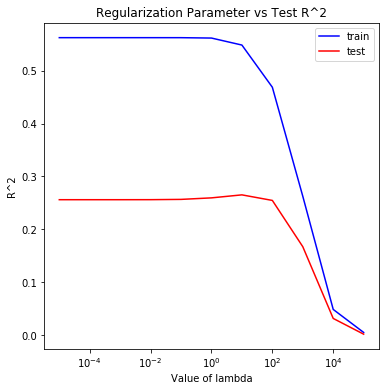

In [1278]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(lam, train_R_sq, color='blue', label='train')
ax.plot(lam, test_R_sq, color='red', label='test')
ax.set_xscale('log')
ax.set_title('Regularization Parameter vs Test R^2')
ax.set_xlabel('Value of lambda')
ax.set_ylabel('R^2')
ax.legend(loc='best')

plt.show()

In [1279]:
#The highest R^2 is obtained for lambda=0.


## Part (f): Regularization/Penalization Methods

As an alternative to selecting a subset of predictors and fitting a regression model on the subset, one can fit a linear regression model on all predictors, but shrink or regularize the coefficient estimates to make sure that the model does not "overfit" the training set. 

Use the following regularization techniques to fit linear models to the training set:
- Ridge regression
- Lasso regression
    
You may choose the shrikage parameter $\lambda$ from the set $\{10^{-5}, 10^{-4},...,10^{4},10^{5}\}$ using cross-validation. In each case, 

- How do the estimated coefficients compare to or differ from the coefficients estimated by a plain linear regression (without shrikage penalty) in Part (b) fropm HW 3? Is there a difference between coefficients estimated by the two shrinkage methods? If so, give an explantion for the difference.
- List the predictors that are assigned a coefficient value close to 0 (say < 1e-10) by the two methods. How closely do these predictors match the redundant predictors (if any) identified in Part (c) from HW 3?
- Is there a difference in the way Ridge and Lasso regression assign coefficients to the predictors `temp` and `atemp`? If so, explain the reason for the difference.

We next analyze the performance of the two shrinkage methods for different training sample sizes:
- Generate random samples of sizes 100, 150, ..., 400 from the training set. You may use the following code to draw a random sample of a specified size from the training set:

In [1280]:
# Cross validation RidgeCV

lam_0 =[0]
lam_1 = [ 1e-5, 1e-4, 1e-3, 1e-2,1e-1,1, 1.0, 10.0, 1e2, 1e3, 1e4, 1e5]
#def ridg_reg_lamV(lm):
train_R_sq_ridg = []
test_R_sq_ridg = []
train_R_sq_lasso = []
test_R_sq_lasso = []

#Ridge       
ridgecv_0 = RidgeCV(alphas=lam_0, normalize=False,cv=10)       
ridgecv_0.fit(X_train, Y_train)
print('Ridge Results for lam=0, Simple regression')
print('The largest R^2 for the training set:',ridgecv_0.score(X_train,Y_train))
print('The largest R^2 for the test set:', ridgecv_0.score(X_test,Y_test))

#Ridge       
ridgecv = RidgeCV(alphas=lam_1, normalize=False,cv=10)       
ridgecv.fit(X_train, Y_train)
print('Ridge Results for best l')
print('Best ridge lambda', ridgecv.alpha_)
print('The largest R^2 for the training set:',ridgecv.score(X_train,Y_train))
print('The largest R^2 for the test set:', ridgecv.score(X_test,Y_test))

#Lasso
lassocv=LassoCV(alphas=lam_1,  normalize=False,cv=10)
lassocv.fit(X_train, Y_train)  
print('Ridge Results for best l')
print('Best lasso lambda', lassocv.alpha_)
print('The largest R^2 for the training set:',lassocv.score(X_train,Y_train))
print('The largest R^2 for the test set:', lassocv.score(X_test,Y_test))

d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.1770137639546625e-19
  ' condition number: {}'.format(rcond), RuntimeWarning)
d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.0738634488324955e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.3651628927876584e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Re

Ridge Results for lam=0, Simple regression
The largest R^2 for the training set: 0.562170009284
The largest R^2 for the test set: 0.256065659935
Ridge Results for best l
Best ridge lambda 10.0
The largest R^2 for the training set: 0.548209629013
The largest R^2 for the test set: 0.265210706402
Ridge Results for best l
Best lasso lambda 10.0
The largest R^2 for the training set: 0.551814651475
The largest R^2 for the test set: 0.274431741646


12


,Simple_par,Ridge_par,Lasso_par,Predictor,comp
0,960.069832,399.678608,647.618418,season_2.0,247.939810
1,1127.896153,222.326689,273.285776,season_3.0,50.959087
2,1298.303500,809.024688,1021.685266,season_4.0,212.660578
3,36.723667,-165.771603,-0.000000,month_2.0,165.771603
4,188.681469,42.405833,0.000000,month_3.0,-42.405833
5,234.776254,303.964910,183.529767,month_4.0,-120.435142
6,-16.579388,154.327553,0.000000,month_5.0,-154.327553
7,-724.620293,-292.136983,-332.993090,month_6.0,-40.856107
8,-1159.819719,-489.296166,-445.994367,month_7.0,43.301799
9,-700.008096,-87.766801,-0.000000,month_8.0,87.766801


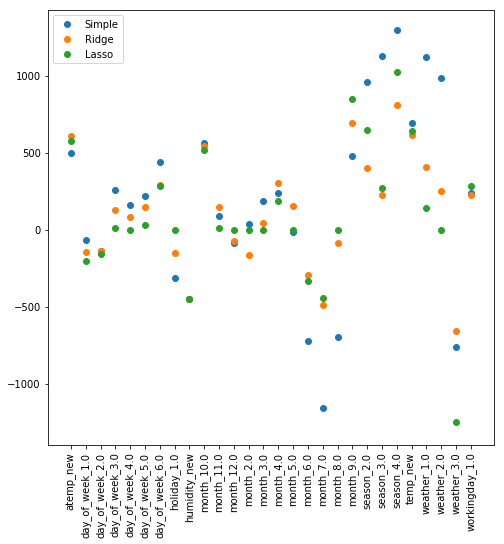

In [1281]:
Coef=pd.DataFrame()
Coef['Simple_par']=ridgecv_0.coef_  #parameters for simple reg, all predictors
Coef['Ridge_par']=ridgecv.coef_  #parameters for ridge reg, all predictors,with best lambda
Coef['Lasso_par']=lassocv.coef_ #parameters for lasso reg, all predictors,with best lambda
Coef['Predictor']=cols_f[:28]
Coef['comp']=Coef.Lasso_par - Coef.Ridge_par
print(np.count_nonzero(Coef['comp']>0))

plt.figure(figsize=(8, 8))
s=plt.scatter(Coef.Predictor,Coef.Simple_par)
r=plt.scatter(Coef.Predictor,Coef.Ridge_par)
l=plt.scatter(Coef.Predictor,Coef.Lasso_par)
plt.xticks( rotation='vertical')
plt.legend((s,
            r,l),('Simple',
                    'Ridge','Lasso'))
Coef




In [1282]:
#How do the estimated coefficients compare to or differ from the coefficients estimated by a plain linear regression 
#(without shrikage penalty) in Part (b) from HW 3? Is there a difference between coefficients estimated by the two 
#shrinkage methods? If so, give an explantion for the difference.
#- For all the three regression methods the coefficients are different. 
# 
#the size of coefficients increase with increase in model complexity. 
#thus putting a constraint on the magnitude of coefficients can be a good idea to reduce model complexity.
#What does a large coefficient signify? It means that we’re putting a lot of emphasis on that feature, 
#i.e. the particular feature is a good predictor for the outcome. When it becomes too large, the algorithm starts 
#modelling intricate relations to estimate the output and ends up overfitting to the particular training data.
#as the value of alpha increases, the model complexity reduces,Though higher values of alpha reduce overfitting, significantly 
#high values can cause underfitting 

# List the predictors that are assigned a coefficient value close to 0 (say < 1e-10) by the two methods. 
# the coef. estimated by ridge &lasso are definitely smaller, than those of the simple regression.This is the main puprose of 
# these two regression methods, to reruce the chance for overfitting (by putting additional constrains on the parameters) , while
# lasso reg. sets some of the predictors to 0.
# Predictors set to zero by lasso:Month 2,3, 5, 8, 12. holiday 1, weather 2., day of week 4.
# mostly these predictors match the predictors from hw3 (C), except the weathe predictor, that we found as significant.However
# since the weather predictor is correlated with other predictors also representin weather, differnet set of predictors might also 
#result in a goot estimation
# How closely do these predictors match the redundant predictors (if any) identified in Part (c) from HW 3?
# Is there a difference in the way Ridge and Lasso regression assign coefficients to the predictors temp and atemp?
# If so, explain the reason for the difference.
# Ridge: the values of the temp&atemp are close to each other. since ridge does not set to zero any of the predictors it includes them all
# but the coefficients will be distributed among them depending on the correlation.
# Lasso: It arbitrarily selects any one feature among the highly correlated ones and reduced the coefficients of the rest
#to zero. Also, the chosen variable changes randomly with change in model parameters. 
#This generally doesn’t work that well as compared to ridge regression.
#since temp&months 5-9 are highly correlated , the regression has chosen to set to zero month 5&8, however, for both ridge and lasso
#the temp and a_temp coef are very closeto each other



In [1283]:
# let us try to repeat the lasso, simple and ridge without the predictors set to zero.
cols_f_1=[               #'season_1.0',
                        'season_2.0', 'season_3.0', 'season_4.0', 
                     # 'month_1.0',
                       #'month_2.0', 'month_3.0', 
                    'month_4.0', 
                  #  'month_5.0', 
                    'month_6.0', 'month_7.0',
                     #  'month_8.0', 
                    'month_9.0', 'month_10.0', 'month_11.0',# 'month_12.0',           
                         # 'holiday_0.0',
                          #  'holiday_1.0',     
                       # 'day_of_week_0.0',
                        'day_of_week_1.0', 'day_of_week_2.0', 'day_of_week_3.0',#'day_of_week_4.0',
                       'day_of_week_5.0', 'day_of_week_6.0',
                         # 'workingday_0.0',
                        'workingday_1.0', 
   'weather_1.0', 
                      #  'weather_2.0', 
    'weather_3.0',
      'temp_new','atemp_new',  'humidity_new', 'windspeed_new',     
    'count' 
] 
np.count_nonzero(cols_f_1)
#print(cols_f_1[:21])

22

In [1284]:
df_train_f_1=finilize(dftrain_oneH,cols_f_1)
df_test_f_1=finilize(dftest_oneH,cols_f_1)


In [1285]:
X_train_1=df_train_f_1[cols_f_1[:21]].values
Y_train_1=df_train_f_1['count'].values

X_test_1=df_test_f_1[cols_f_1[:21]].values
Y_test_1=df_test_f_1['count'].values


In [1286]:
lam_0 =[0]
lam_1 = [ 1e-5, 1e-4, 1e-3, 1e-2,1e-1,1, 1.0, 10.0, 1e2, 1e3, 1e4, 1e5]
#def ridg_reg_lamV(lm):
train_R_sq_ridg_1 = []
test_R_sq_ridg_1 = []
train_R_sq_lasso_1 = []
test_R_sq_lasso_1 = []

#Ridge       
ridgecv_0_1 = RidgeCV(alphas=lam_0, normalize=False,cv=10)       
ridgecv_0_1.fit(X_train_1, Y_train_1)

print('Ridge Results for lam=0, Simple regression')
print('The largest R^2 for the training set:',ridgecv_0_1.score(X_train_1,Y_train_1))
print('The largest R^2 for the test set:', ridgecv_0_1.score(X_test_1,Y_test_1))

#Ridge       
ridgecv_1 = RidgeCV(alphas=lam_1, normalize=False,cv=10)       
ridgecv_1.fit(X_train_1, Y_train_1)
print('Ridge Results for best l')
print('Best ridge lambda', ridgecv_1.alpha_)
print('The largest R^2 for the training set:',ridgecv_1.score(X_train_1,Y_train_1))
print('The largest R^2 for the test set:', ridgecv_1.score(X_test_1,Y_test_1))

#Lasso
lassocv_1=LassoCV(alphas=lam_1,  normalize=False,cv=10)
lassocv_1.fit(X_train_1, Y_train_1)  
print('Ridge Results for best l')
print('Best lasso lambda', lassocv_1.alpha_)
print('The largest R^2 for the training set:',lassocv_1.score(X_train_1,Y_train_1))
print('The largest R^2 for the test set:', lassocv_1.score(X_test_1,Y_test_1))

Ridge Results for lam=0, Simple regression
The largest R^2 for the training set: 0.572300620502
The largest R^2 for the test set: 0.266264405507
Ridge Results for best l
Best ridge lambda 10.0
The largest R^2 for the training set: 0.560070309094
The largest R^2 for the test set: 0.27189205141
Ridge Results for best l
Best lasso lambda 10.0
The largest R^2 for the training set: 0.564810327031
The largest R^2 for the test set: 0.276583747257


In [1287]:
Coef=pd.DataFrame()
Coef['Simple_par_1']=ridgecv_0_1.coef_  #parameters for simple reg, all predictors
Coef['Ridge_par_1']=ridgecv_1.coef_  #parameters for ridge reg, all predictors,with best lambda
Coef['Lasso_par_1']=lassocv_1.coef_ #parameters for lasso reg, all predictors,with best lambda
Coef['Predictor_1']=cols_f_1[:21]
Coef['comp_1']=Coef.Lasso_par_1 - Coef.Ridge_par_1
print(np.count_nonzero(Coef['comp_1']>0))

#plt.figure(figsize=(8, 8))
#s=plt.scatter(Coef.Predictor,Coef.Simple_par)
#r=plt.scatter(Coef.Predictor,Coef.Ridge_par)
#l=plt.scatter(Coef.Predictor,Coef.Lasso_par)
#plt.xticks( rotation='vertical')
#plt.legend((s,
 #           r,l),('Simple',
 #                   'Ridge','Lasso'))
Coef

9


,Simple_par_1,Ridge_par_1,Lasso_par_1,Predictor_1,comp_1
0,865.398340,477.751640,544.233105,season_2.0,66.481466
1,524.707564,136.471023,112.314955,season_3.0,-24.156068
2,942.760390,733.831195,895.539099,season_4.0,161.707904
3,369.719034,322.659263,310.984623,month_4.0,-11.674640
4,-527.382275,-330.225952,-352.801947,month_6.0,-22.575995
5,-642.307193,-498.120313,-494.647811,month_7.0,3.472502
6,902.379588,691.084769,831.565312,month_9.0,140.480543
7,774.290781,523.798912,482.914552,month_10.0,-40.884360
8,345.921733,184.438258,66.663914,month_11.0,-117.774344
9,-254.249676,-191.235443,-179.692771,day_of_week_1.0,11.542672


In [1288]:
#gettint rid of the vars set to zero at the previous step, 
#Ridge:Temp & atemp have almost similar weight.
#Lasso:The temp is ~2 larger than a-temp coeff. 
#However, the predictors that were chosen at hw3 (C) 
#have the abs larger values than the rest of the predictors.

In [1289]:
#--------  sample
# A function to select a random sample of size k from the training set
# Input: 
#      x (n x d array of predictors in training data)
#      y (n x 1 array of response variable vals in training data)
#      k (size of sample) 
# Return: 
#      chosen sample of predictors and responses

def sample(x, y, k):
    n = x.shape[0] # No. of training points    
    # Choose random indices of size 'k'
    subset_ind = np.random.choice(np.arange(n), k)    
    # Get predictors and reponses with the indices
    x_subset = x[subset_ind, :]
    y_subset = y[subset_ind]    
    return (x_subset, y_subset)

In [1290]:
#X_train=df_train_f[cols_f[:28]].values
#Y_train=df_train_f['count'].values

#X_test=df_test_f[cols_f[:28]].values
#Y_test=df_test_f['count'].values

#100, 150, ..., 400
x_subset_100, y_subset_100=sample(X_train,Y_train,100)
lam_0 =[0]
lam_1 = [ 1e-5, 1e-4, 1e-3, 1e-2,1e-1,1, 1.0, 10.0, 1e2, 1e3, 1e4, 1e5]
#def ridg_reg_lamV(lm):
train_R_sq_ridg_2 = []
test_R_sq_ridg_2 = []
train_R_sq_lasso_2 = []
test_R_sq_lasso_2 = []

train_R_sq_ridg_2_avg =  []
test_R_sq_ridg_2_avg =   []
train_R_sq_lasso_2_avg = []
test_R_sq_lasso_2_avg =  []

train_R_sq_ridg_2_std =  []
test_R_sq_ridg_2_std =   []
train_R_sq_lasso_2_std = []
test_R_sq_lasso_2_std =  []  

train_R_sq_simple_2_avg =[]
test_R_sq_simple_2_avg = []
train_R_sq_simple_2_std = []
test_R_sq_simple_2_std =  []

for i in range(2,8):
        k=(i-1)*50
             #print (y_subset_tr.size,y_subset_ts.size)
        train_R_sq_ridg_2 = []
        test_R_sq_ridg_2 =  []
        train_R_sq_lasso_2 =[]
        test_R_sq_lasso_2 = []
       #simple regression model 
        train_R_sq_simple_2=[]
        test_R_sq_simple_2 =[]
        for j in range(0,10): 
                x_subset_tr, y_subset_tr=sample(X_train,Y_train,k)
                x_subset_ts, y_subset_ts=sample(X_test,Y_test,k) 
               # print (y_subset_tr.size,y_subset_ts.size)
                ridgecv_2 = RidgeCV(alphas=lam_1, normalize=False,cv=4)       
                ridgecv_2.fit( x_subset_tr, y_subset_tr)   
                
                train_R_sq_ridg_2.append(ridgecv_2.score(x_subset_tr, y_subset_tr))
                test_R_sq_ridg_2.append(ridgecv_2.score(x_subset_ts, y_subset_ts))
                
                #simple regression model 
                simple_2_0 = RidgeCV(alphas=lam_0, normalize=False,cv=4)       
                simple_2_0.fit( x_subset_tr, y_subset_tr)
                train_R_sq_simple_2.append(simple_2_0.score(x_subset_tr, y_subset_tr))
                test_R_sq_simple_2.append(simple_2_0.score(x_subset_ts, y_subset_ts))
       
                lassocv_2=LassoCV(alphas=lam_1,  normalize=False,cv=4)               
                lassocv_2.fit(x_subset_tr, y_subset_tr) 
                train_R_sq_lasso_2.append(lassocv_2.score(x_subset_tr, y_subset_tr))
                test_R_sq_lasso_2.append(lassocv_2.score(x_subset_ts, y_subset_ts))
                
        print(train_R_sq_lasso_2)
        print (ridgecv_2.score(x_subset_tr, y_subset_tr))
    
        train_R_sq_ridg_2_avg.append(np.mean(train_R_sq_ridg_2))
        test_R_sq_ridg_2_avg.append(np.mean(test_R_sq_ridg_2))
        train_R_sq_lasso_2_avg.append(np.mean(train_R_sq_lasso_2))
        test_R_sq_lasso_2_avg.append(np.mean(test_R_sq_lasso_2))

        train_R_sq_ridg_2_std.append(np.std(train_R_sq_ridg_2))
        test_R_sq_ridg_2_std.append(np.std(test_R_sq_ridg_2))
        train_R_sq_lasso_2_std.append(np.std(train_R_sq_lasso_2))
        test_R_sq_lasso_2_std.append(np.std(test_R_sq_lasso_2))
        
        train_R_sq_simple_2_avg.append(np.mean(train_R_sq_simple_2))
        test_R_sq_simple_2_avg.append(np.mean(test_R_sq_simple_2))
        train_R_sq_simple_2_std.append(np.std(train_R_sq_simple_2))
        test_R_sq_simple_2_std.append(np.std(test_R_sq_simple_2))


d:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
d:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.093388139999354e-19
  ' condition number: {}'.format(rcond), RuntimeWarning)
d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guarant

[0.491093752408373, 0.64667107409078772, 0.45278454168407334, 0.62894902634693239, 0.46675076586669689, 0.5403533605821369, 0.42885958863137053, 0.48952054175574938, 0.80583800942018935, 0.6388831512091957]
0.723970037052


d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.029367297738778e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 7.890885158938061e-19
  ' condition number: {}'.format(rcond), RuntimeWarning)
d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.023390594569958e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Resul

d:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 9.101227730611687e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.0002956575850309e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is no

[0.4633276615137244, 0.67381576913665808, 0.48235230995784767, 0.52625282465591638, 0.71503622035165448, 0.61567392766579887, 0.67883348168514746, 0.650750958378015, 0.64975721273162901, 0.56695036682942068]
0.649007494527


d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 9.201497218702189e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 9.522089009153839e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 7.173216169119273e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Resul

d:\Users\Home\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.391607827476051e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 6.5255158272852314e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is no

[0.68806710559763307, 0.61762881975776951, 0.61814941843192783, 0.64893519915932329, 0.62557469441231195, 0.66001851002164957, 0.64434957210598243, 0.55285921969870211, 0.72161900326213801, 0.5544861719266192]
0.640157364968


d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.1510283386388573e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.8279826158543897e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 9.845778184155961e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Res

d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.2341369187084283e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.4667546613992076e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.5985983252409218e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Re

[0.59049591734348561, 0.5602234779768126, 0.56747878267151231, 0.606242230798266, 0.57025653778476104, 0.65420588232564603, 0.6097654219840376, 0.56638447890563626, 0.57047297723119006, 0.65043373473421262]
0.66654064839


d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.7596795532988335e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.5236044813595362e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.1258248744575873e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Re

d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.2997022588820808e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.5204911779901815e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 9.912108886015092e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Res

[0.62135399531870705, 0.62267403358741868, 0.60579464696370255, 0.59000235164851067, 0.62967048280059679, 0.61217388438554854, 0.61054321352001961, 0.58361163377848135, 0.51839100041646857, 0.64810745302950945]
0.633412945706


d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.5028093475502762e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 7.044275771921537e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.1419976963586985e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Res

d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.790223979804138e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 6.380401659558193e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.1038935481226084e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Resu

[0.58410007941484754, 0.58794601384699674, 0.64147673295356467, 0.55278912775257882, 0.59088940555350322, 0.56875880923675171, 0.61744541682003828, 0.5791118684957034, 0.49096652051887879, 0.57026288903637223]
0.581701966735


d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.292085406994359e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.2270179152675002e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.468218339715665e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Resu

In [1291]:
lin=(50,100,150,200,250,300)
df_sns=pd.DataFrame(columns=['train_R_sq_ridg_2_avg'  ,   'test_R_sq_ridg_2_avg', 
                             'train_R_sq_simple_2_avg',   'test_R_sq_simple_2_avg',
                             'train_R_sq_lasso_2_avg' ,   'test_R_sq_lasso_2_avg', 
                                                                 
                             'train_R_sq_ridg_2_std'  ,   'test_R_sq_ridg_2_std', 
                             'train_R_sq_simple_2_std',   'test_R_sq_simple_2_std',
                             'train_R_sq_lasso_2_std' ,   'test_R_sq_lasso_2_std', 
                            ])

df_sns['train_R_sq_ridg_2_avg']=  train_R_sq_ridg_2_avg;
df_sns['test_R_sq_ridg_2_avg']=   test_R_sq_ridg_2_avg;
df_sns['train_R_sq_simple_2_avg']=train_R_sq_simple_2_avg;
df_sns['test_R_sq_simple_2_avg']= test_R_sq_simple_2_avg;
df_sns['train_R_sq_lasso_2_avg']= train_R_sq_lasso_2_avg;
df_sns['test_R_sq_lasso_2_avg']=  test_R_sq_lasso_2_avg;

df_sns['train_R_sq_ridg_2_std']=  train_R_sq_ridg_2_std;
df_sns['test_R_sq_ridg_2_std']=   test_R_sq_ridg_2_std;
df_sns['train_R_sq_simple_2_std']=train_R_sq_simple_2_std;
df_sns['test_R_sq_simple_2_std']= test_R_sq_simple_2_std;
df_sns['train_R_sq_lasso_2_std']= train_R_sq_lasso_2_std;
df_sns['test_R_sq_lasso_2_std']=  test_R_sq_lasso_2_std;


df_sns['train_R_sq_ridg_2_avg_Low']=df_sns['train_R_sq_ridg_2_avg']-df_sns['train_R_sq_ridg_2_std']
df_sns['train_R_sq_ridg_2_avg_High']=df_sns['train_R_sq_ridg_2_avg']+df_sns['train_R_sq_ridg_2_std']

df_sns['test_R_sq_ridg_2_avg_Low']=df_sns['test_R_sq_ridg_2_avg']-df_sns['test_R_sq_ridg_2_std']
df_sns['test_R_sq_ridg_2_avg_High']=df_sns['test_R_sq_ridg_2_avg']+df_sns['test_R_sq_ridg_2_std']

df_sns['train_R_sq_simple_2_avg_Low']=df_sns['train_R_sq_simple_2_avg']-df_sns['train_R_sq_simple_2_std']
df_sns['train_R_sq_simple_2_avg_High']=df_sns['train_R_sq_simple_2_avg']+df_sns['train_R_sq_simple_2_std']

df_sns['test_R_sq_simple_2_avg_Low']=df_sns['test_R_sq_simple_2_avg']-df_sns['test_R_sq_simple_2_std']
df_sns['test_R_sq_simple_2_avg_High']=df_sns['test_R_sq_simple_2_avg']+df_sns['test_R_sq_simple_2_std']

df_sns['train_R_sq_lasso_2_avg_Low']=df_sns['train_R_sq_lasso_2_avg']-df_sns['train_R_sq_lasso_2_std']
df_sns['train_R_sq_lasso_2_avg_High']=df_sns['train_R_sq_lasso_2_avg']+df_sns['train_R_sq_lasso_2_std']

df_sns['test_R_sq_lasso_2_avg_Low']=df_sns['test_R_sq_lasso_2_avg']-df_sns['test_R_sq_lasso_2_std']
df_sns['test_R_sq_lasso_2_avg_High']=df_sns['test_R_sq_lasso_2_avg']+df_sns['test_R_sq_lasso_2_std']


df_sns['samples']=lin
#df_sns=df_sns.set_index('samples')
df_sns

,train_R_sq_ridg_2_avg,test_R_sq_ridg_2_avg,train_R_sq_simple_2_avg,test_R_sq_simple_2_avg,train_R_sq_lasso_2_avg,test_R_sq_lasso_2_avg,train_R_sq_ridg_2_std,test_R_sq_ridg_2_std,train_R_sq_simple_2_std,test_R_sq_simple_2_std,...,test_R_sq_ridg_2_avg_High,train_R_sq_simple_2_avg_Low,train_R_sq_simple_2_avg_High,test_R_sq_simple_2_avg_Low,test_R_sq_simple_2_avg_High,train_R_sq_lasso_2_avg_Low,train_R_sq_lasso_2_avg_High,test_R_sq_lasso_2_avg_Low,test_R_sq_lasso_2_avg_High,samples
0,0.624821,0.142614,0.808545,-402.411315,0.558970,0.144969,0.087659,0.183607,0.064383,1206.061260,...,0.326220,0.744162,0.872929,-1608.472576,803.649945,0.446541,0.671400,-0.024720,0.314658,50
1,0.622248,0.216470,0.696632,0.065167,0.602275,0.201767,0.053115,0.081145,0.037346,0.127570,...,0.297615,0.659286,0.733979,-0.062403,0.192737,0.519093,0.685458,0.139580,0.263954,100
2,0.634099,0.182038,0.678994,0.104225,0.633169,0.174068,0.037565,0.136877,0.033518,0.149861,...,0.318916,0.645476,0.712513,-0.045637,0.254086,0.583072,0.683266,0.049771,0.298365,150
3,0.576782,0.246781,0.612078,0.203348,0.594596,0.243843,0.039728,0.069389,0.032132,0.076601,...,0.316169,0.579946,0.644210,0.126746,0.279949,0.561519,0.627673,0.173397,0.314289,200
4,0.598539,0.220481,0.616215,0.199059,0.604232,0.233309,0.035993,0.081199,0.032701,0.084749,...,0.301680,0.583515,0.648916,0.114310,0.283808,0.570606,0.637858,0.147384,0.319234,250
5,0.571321,0.271896,0.591384,0.250812,0.578375,0.275028,0.043150,0.083475,0.036188,0.079957,...,0.355371,0.555196,0.627572,0.170855,0.330769,0.540635,0.616115,0.193833,0.356224,300


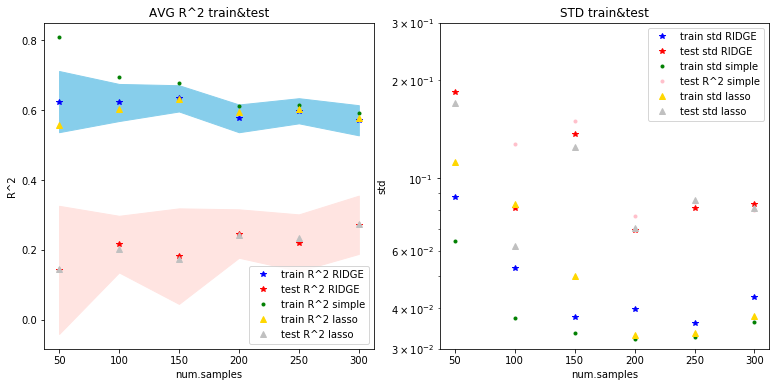

In [1292]:
lin=(50,100,150,200,250,300)
fig, ax = plt.subplots(1, 2, figsize=(13, 6))

ax[0].plot(lin, train_R_sq_ridg_2_avg,'*', color='blue', label='train R^2 RIDGE')
ax[0].fill_between(df_sns.samples,df_sns.train_R_sq_ridg_2_avg_Low,df_sns.train_R_sq_ridg_2_avg_High,color='skyblue')

ax[0].plot(lin, test_R_sq_ridg_2_avg,'*', color='red', label='test R^2 RIDGE')
ax[0].fill_between(df_sns.samples,df_sns.test_R_sq_ridg_2_avg_Low,df_sns.test_R_sq_ridg_2_avg_High,color='mistyrose')

ax[0].plot(lin, train_R_sq_simple_2_avg,'.', color='green', label='train R^2 simple')
#ax[0].plot(lin, test_R_sq_simple_2_avg,'.', color='pink', label='test R^2 simple')
#ax[0].fill_between(df_sns.samples,df_sns.train_R_sq_simple_2_avg_Low,df_sns.train_R_sq_simple_2_avg_High,color='lightgreen')

ax[0].plot(lin,train_R_sq_lasso_2_avg,'^',color='gold',label='train R^2 lasso')

ax[0].plot(lin,test_R_sq_lasso_2_avg,'^',color='silver',label='test R^2 lasso')


ax[0].set_title('AVG R^2 train&test')
ax[0].set_ylabel('R^2')
ax[0].set_xlabel('num.samples')
ax[0].legend(loc='best')

ax[1].plot(lin, train_R_sq_ridg_2_std,'*', color='blue', label='train std RIDGE')
ax[1].plot(lin, test_R_sq_ridg_2_std,'*', color='red', label='test std RIDGE')


ax[1].plot(lin, train_R_sq_simple_2_std,'.', color='green', label='train std simple')
ax[1].plot(lin, test_R_sq_simple_2_std,'.', color='pink', label='test R^2 simple')

ax[1].plot(lin, train_R_sq_lasso_2_std,'^', color='gold', label='train std lasso')
ax[1].plot(lin, test_R_sq_lasso_2_std,'^', color='silver', label='test std lasso')

ax[1].set_title('STD train&test')
ax[1].set_ylabel('std')
ax[1].set_yscale('log')
ax[1].set_xlabel('num.samples')
ax[1].legend(loc='best')
ax[1].set_ylim(0.03,0.3)

plt.show()

In [1293]:
#While the R^2 for all the three methods with increasing the sample set size become closer to each other, the R^2 of the test set 
#for all the ridge and lasso  methods is almost 2 times lower, and almost identical , there are some very low values for the test 
#set of the simple regression model, indicating that the prediction of the training set on the small test set was not sucesfull
#at all, thus given a small set we would rather use the lasso or the ridge reg. due to additional constraint on the coefs. of the 
#predictors , this methods predict more stable results that improve with the increase of the set size.
#the confidense intervals with the increase of the set size become tighter
#recomendation:lasso or ridge, probably lasso due to the ability to settle some of the predictors to zero

- Fit linear, Ridge and Lasso regression models to each of the generated sample. In each case, compute the $R^2$ score for the model on the training sample on which it was fitted, and on the test set.
- Repeat the above experiment for 10 random trials/splits, and compute the average train and test $R^2$ across the trials for each training sample size. Also, compute the standard deviation (SD) in each case.
- Make a plot of the mean training $R^2$ scores for the linear, Ridge and Lasso regression methods as a function of the training sample size. Also, show a confidence interval for the mean scores extending from **mean - SD** to **mean + SD**. Make a similar plot for the test $R^2$ scores.

How do the training and test $R^2$ scores compare for the three methods? Give an explanation for your observations. How do the confidence intervals for the estimated $R^2$ change with training sample size? Based on the plots, which of the three methods would you recommend when one needs to fit a regression model using a small training sample?

*Hint:* You may use `sklearn`'s `RidgeCV` and `LassoCV` classes to implement Ridge and Lasso regression. These classes automatically perform cross-validation to tune the parameter $\lambda$ from a given range of values. You may use the `plt.errorbar` function to plot confidence bars for the average $R^2$ scores.

your answers here

## Part (g): Polynomial & Interaction Terms

Moving beyond linear models, we will now try to improve the performance of the regression model in Part (b) from HW 3 by including higher-order polynomial and interaction terms. 

- For each continuous predictor $X_j$, include additional polynomial terms $X^2_j$, $X^3_j$, and $X^4_j$, and fit a multiple regression model to the expanded training set. How does the $R^2$ of this model on the test set compare with that of the linear model fitted in Part (b) from HW 3? Using a t-test, find out which of estimated coefficients for the polynomial terms are statistically significant at a significance level of 5%. 

- Fit a multiple linear regression model with additional interaction terms $\mathbb{I}_{month = 12} \times temp$ and $\mathbb{I}_{workingday = 1} \times \mathbb{I}_{weathersit = 1}$ and report the test $R^2$ for the fitted model. How does this compare with the $R^2$ obtained using linear model in Part (b) from HW 3? Are the estimated coefficients for the interaction terms statistically significant at a significance level of 5%?

In [1349]:
X_train_temp = df_train_f_1[['temp_new']].values.reshape(331, 1)
X_train_atemp=df_train_f_1[['atemp_new']].values.reshape(331, 1)
X_train_humidity=df_train_f_1[['humidity_new']].values.reshape(331, 1)
X_train_windspeed=df_train_f_1[['windspeed_new']].values.reshape(331, 1)

X_test_temp = df_test_f[['temp_new']].values.reshape(400, 1)
X_test_atemp=df_test_f[['atemp_new']].values.reshape(400, 1)
X_test_humidity=df_test_f[['humidity_new']].values.reshape(400, 1)
X_test_windspeed=df_test_f[['windspeed_new']].values.reshape(400, 1)


In [1891]:
gen_poly_terms = PolynomialFeatures(degree=4, interaction_only=False)
X_temp_pol = gen_poly_terms.fit_transform(X_train_temp)
X_atemp_pol = gen_poly_terms.fit_transform(X_train_atemp)
X_humidity_pol = gen_poly_terms.fit_transform(X_train_humidity)
X_windspeed_pol = gen_poly_terms.fit_transform(X_train_windspeed)

X_test_temp_pol=gen_poly_terms.fit_transform(X_test_temp)
X_test_atemp_pol=gen_poly_terms.fit_transform(X_test_atemp)
X_test_humidity_pol=gen_poly_terms.fit_transform(X_test_humidity)
X_test_windspeed_pol=gen_poly_terms.fit_transform(X_test_windspeed)


array([[ 1.        ,  0.62474283,  0.39030361,  0.24383938,  0.15233691]])

In [1351]:
df_temp = pd.DataFrame(X_temp_pol)
df_temp=df_temp.rename(columns={0:"temp_0",1:"temp_1",2:"temp_2",3:"temp_3",4:"temp_4"})
df_atemp = pd.DataFrame(X_atemp_pol)
df_atemp=df_atemp.rename(columns={0:"atemp_0",1:"atemp_1",2:"atemp_2",3:"atemp_3",4:"atemp_4"})
df_humidity = pd.DataFrame(X_humidity_pol)
df_humidity=df_humidity.rename(columns={0:"humidity_0",1:"humidity_1",2:"humidity_2",3:"humidity_3",4:"humidity_4"})
df_windspeed = pd.DataFrame(X_windspeed_pol)
df_windspeed=df_windspeed.rename(columns={0:"windspeed_0",1:"windspeed_1",2:"windspeed_2",3:"windspeed_3",4:"windspeed_4"})

df_temp_test = pd.DataFrame(X_test_temp_pol)
df_temp_test=df_temp_test .rename(columns={0:"temp_0",1:"temp_1",2:"temp_2",3:"temp_3",4:"temp_4"})
df_atemp_test = pd.DataFrame(X_test_atemp_pol)
df_atemp_test=df_atemp_test.rename(columns={0:"atemp_0",1:"atemp_1",2:"atemp_2",3:"atemp_3",4:"atemp_4"})
df_humidity_test = pd.DataFrame(X_test_humidity_pol)
df_humidity_test=df_humidity_test.rename(columns={0:"humidity_0",1:"humidity_1",2:"humidity_2",3:"humidity_3",4:"humidity_4"})
df_windspeed_test = pd.DataFrame(X_test_windspeed_pol)
df_windspeed_test=df_windspeed_test.rename(columns={0:"windspeed_0",1:"windspeed_1",2:"windspeed_2",3:"windspeed_3",4:"windspeed_4"})



In [1352]:
df_train_pol=pd.concat([df_train_f, df_temp,df_atemp,df_humidity,df_windspeed], axis=1)
#df_train_pol.columns.tolist()
del df_train_pol['temp_new']
del df_train_pol['atemp_new']
del df_train_pol['humidity_new']
del df_train_pol['windspeed_new']
del df_train_pol[ 'humidity_0']
del df_train_pol[  'windspeed_0']


In [1880]:
#df_train_pol.columns.tolist()

In [1353]:
df_test_pol=pd.concat([df_test_f, df_temp_test,df_atemp_test,df_humidity_test,df_windspeed_test], axis=1)
del df_test_pol['temp_new']
del df_test_pol['atemp_new']
del df_test_pol['humidity_new']
del df_test_pol['windspeed_new']
del df_test_pol[ 'humidity_0']
del df_test_pol[  'windspeed_0']
del df_test_pol[  'atemp_0']


In [1895]:
#df_test_pol.head()

In [1892]:
cols_f_pol=df_test_pol.columns.tolist()
c=cols_f_pol[26:27]
col1=cols_f_pol[:25]
col2=col1+cols_f_pol[27:] #+c
#print(col2)
#len(cols_f_pol)
#col2

In [1901]:
X_train_pol=df_train_pol[col2].values
Y_train_pol=df_train_pol['count'].values

X_test_pol=df_test_pol[col2].values
Y_test_pol=df_test_pol['count'].values


In [1902]:
ridgecv_pol_0 = RidgeCV(alphas=lam_0, normalize=False,cv=2)       
ridgecv_pol_0.fit(X_train_pol, Y_train_pol)
print('Ridge Results for lam=0, Simple regression')
print('The largest R^2 for the training set:',ridgecv_pol_0.score(X_train_pol,Y_train_pol))
print('The largest R^2 for the test set:', ridgecv_pol_0.score(X_test_pol,Y_test_pol))

Ridge Results for lam=0, Simple regression
The largest R^2 for the training set: 0.669656240221
The largest R^2 for the test set: 0.294070223623


d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.9736761299043706e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 6.311553534857486e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.1386720176095823e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)


In [1903]:
result_all = sm.OLS(Y_train_pol,X_train_pol).fit()

In [1904]:
y_hat_train_poly = result_all.predict(X_train_pol)
y_hat_test_poly = result_all.predict(X_test_pol)
print(r2_score(Y_test_pol, y_hat_test_poly))

0.294070223623


In [1905]:
result_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     15.13
Date:                Wed, 17 Jan 2018   Prob (F-statistic):           7.98e-50
Time:                        16:26:32   Log-Likelihood:                -2790.9
No. Observations:                 331   AIC:                             5662.
Df Residuals:                     291   BIC:                             5814.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           766.4307    454.546      1.686      0.093    -128.185    1661.046
x2          1578.7544    519.364      3.040      0.003     556.569    2600.940
x3          1523.2288    467.580      3.258      0.001     602.961    2443.496
x4          -325.0686    409.611     -0.794      0.428   -1131.245     481.108
x5          -304.8491    446.028     -0.683      0.495   -1182.700     573.002
x6          -418.0245    639.524     -0.654      0.514   -1676.703     840.654
x7         -1037.2042    677.186     -1.532      0.127   -2370.008     295.599
x8         -1456.1857    697.520     -2.088      0.038   -2829.010     -83.362
x9         -1416.9882    749.751     -1.890      0.060   -2892.610      58.634
x10        -1715.9389    743.240     -2.309      0.022   -3178.747    -253.131
x11        -1073.4008    660.859     -1.624      0.105   -2374.069     227.268
x12         -925.8710    617.522     -1.499      0.135   -2141.247     289.505
x13         -825.5328    591.138     -1.397      0.164   -1988.981     337.916
x14         -555.6676    479.543     -1.159      0.248   -1499.481     388.146
x15         -189.7675    365.157     -0.520      0.604    -908.451     528.916
x16          -93.3265    156.015     -0.598      0.550    -400.387     213.734
x17         -133.4279    184.734     -0.722      0.471    -497.012     230.156
x18          147.7313    195.071      0.757      0.449    -236.197     531.660
x19           30.5924    187.547      0.163      0.871    -338.528     399.713
x20          209.9371    182.024      1.153      0.250    -148.313     568.187
x21          471.0834    246.557      1.911      0.057     -14.178     956.345
x22          351.2739    150.615      2.332      0.020      54.841     647.707
x23         5035.2713    460.417     10.936      0.000    4129.101    5941.442
x24         5094.2831    480.111     10.611      0.000    4149.352    6039.214
x25         3991.2716    710.187      5.620      0.000    2593.518    5389.025
x26          770.3204    758.967      1.015      0.311    -723.441    2264.082
x27        -1805.5466    814.442     -2.217      0.027   -3408.491    -202.602
x28            8.5688    274.482      0.031      0.975    -531.653     548.790
x29          -44.9184    170.385     -0.264      0.792    -380.261     290.425
x30          895.9192    712.094      1.258      0.209    -505.588    2297.426
x31         1171.9491    786.481      1.490      0.137    -375.962    2719.861
x32         -302.5595    244.983     -1.235      0.218    -784.722     179.603
x33          -20.6433    146.714     -0.141      0.888    -309.398     268.112
x34         -667.9033    157.118     -4.251      0.000    -977.136    -358.671
x35          -53.5087    154.914     -0.345      0.730    -358.402     251.384
x36          -15.9849     44.689     -0.358      0.721    -103.940      71.970
x3

In [1906]:
#significant variables according to polynomial fitting
df_pv=pd.DataFrame(result_all.pvalues)
df_sel=pd.DataFrame(result_all.pvalues)
df_pv['p_val']=result_all.pvalues
df_pv['coef']=result_all.params
df_pv['names']=col2

df_sel=df_pv[df_pv.p_val<0.05]
df_sel

,0,p_val,coef,names
1,2.582724e-03,2.582724e-03,1578.754367,season_3.0
2,1.256241e-03,1.256241e-03,1523.228823,season_4.0
7,3.769801e-02,3.769801e-02,-1456.185656,month_6.0
9,2.165939e-02,2.165939e-02,-1715.938891,month_8.0
21,2.036885e-02,2.036885e-02,351.273944,workingday_1.0
22,1.504637e-23,1.504637e-23,5035.271259,weather_1.0
23,1.887572e-22,1.887572e-22,5094.283142,weather_2.0
24,4.469192e-08,4.469192e-08,3991.271585,weather_3.0
26,2.740200e-02,2.740200e-02,-1805.546619,temp_2
33,2.870343e-05,2.870343e-05,-667.903254,humidity_1


In [1360]:
# HW 3(b)
#season_3.0,month_6.0,month_12.0,day_of_week_5.0,day_of_week_6.0,workingday_0.0,workingday_1.0,weather_1.0,atemp_new,humidity_new
#windspeed_new
#THe R^2 of both test and trains are higher

In [1908]:
#Fit a multiple linear regression model with additional interaction terms  
#𝕀month=12×temp  and  𝕀weathersit=1Iworkingday=1×Iweathersit=1 
#and report the test  R2R2  for the fitted model. How does this compare with the  R2R2  obtained
#using linear model in Part (b) from HW 3? Are the estimated coefficients for the interaction terms 
#statistically significant at a significance level of 5%?
df_train_pol_p=df_train_pol
df_train_pol["month_12.0*temp_1"]=df_train_pol['month_12.0']*df_train_pol['temp_1']
df_train_pol["workingday_1.0*weather_1.0"]=df_train_pol['workingday_1.0']*df_train_pol['weather_1.0']
df_train_i=df_train_pol
df_test_pol_p=df_test_pol
df_test_pol["month_12.0*temp_1"]=df_test_pol['month_12.0']*df_test_pol['temp_1']
df_test_pol["workingday_1.0*weather_1.0"]=df_test_pol['workingday_1.0']*df_test_pol['weather_1.0']
df_test_i=df_test_pol

In [1915]:
cols_f_pol=df_test_i.columns.tolist()
ca=cols_f_pol[26:27]
col1a=cols_f_pol[:25]
col2a=col1a+cols_f_pol[27:] #+ca
#col2a
#len(cols_f_pol)

In [1334]:
del df_train_i['temp_2']
del df_train_i['temp_3']
del df_train_i['temp_4']
del df_train_i['atemp_2']
del df_train_i['atemp_3']
del df_train_i['atemp_4']
del df_train_i['humidity_2']
del df_train_i['humidity_3']
del df_train_i['humidity_4']
del df_train_i['windspeed_2']
del df_train_i['windspeed_3']
del df_train_i['windspeed_4']

In [1335]:
del df_test_i['temp_2']
del df_test_i['temp_3']
del df_test_i['temp_4']
del df_test_i['atemp_2']
del df_test_i['atemp_3']
del df_test_i['atemp_4']
del df_test_i['humidity_2']
del df_test_i['humidity_3']
del df_test_i['humidity_4']
del df_test_i['windspeed_2']
del df_test_i['windspeed_3']
del df_test_i['windspeed_4']

In [1916]:
cols_f_i=df_test_i.columns.tolist()
cols_i=cols_f_i[:25] +cols_f_i[26:]
cb=cols_i[25:26]
col1b=cols_f_pol[:25]
col2b=col1b+cols_i[27:]#+cb

#col2b

In [1913]:
X_train_pol_i=df_train_i[col2b].values
Y_train_pol_i=df_train_i['count'].values

X_test_pol_i=df_test_i[col2b].values
Y_test_pol_i=df_test_i['count'].values

In [1914]:
ridgecv_pol_0_i = RidgeCV(alphas=lam_0, normalize=False,cv=10)       
ridgecv_pol_0_i.fit(X_train_pol_i, Y_train_pol_i)
print('Ridge Results for lam=0, Simple regression')
print('The largest R^2 for the training set:',ridgecv_pol_0_i.score(X_train_pol_i,Y_train_pol_i))
print('The largest R^2 for the test set:', ridgecv_pol_0_i.score(X_test_pol_i,Y_test_pol_i))

Ridge Results for lam=0, Simple regression
The largest R^2 for the training set: 0.668732582864
The largest R^2 for the test set: 0.30507682804


d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.0212765157876567e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.3469904626412363e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.3108548693760066e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
d:\Users\Home\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Re

In [1140]:
#results of this model are insignificantly better (regarding R^2 of the linear model only)
# however the polynomial model delivers better results

In [1141]:
result_all_i = sm.OLS(Y_train_pol_i,X_train_pol_i).fit()
result_all_i

In [1142]:
#significant variables according to polynomial fitting
df_pv_i=pd.DataFrame(result_all_i.pvalues)
df_sel_i=pd.DataFrame(result_all_i.pvalues)
df_pv_i['p_val']=result_all_i.pvalues
df_pv_i['coef']=result_all_i.params
df_pv_i['names']=col2b

df_sel_i=df_pv_i[df_pv_i.p_val<0.05]
df_sel_i

,0,p_val,coef,names
22,6.223369e-06,6.223369e-06,1142.148147,weather_1.0
23,2.000841e-09,2.000841e-09,1315.999877,weather_2.0
25,1.865007e-08,1.865007e-08,1021.429826,atemp_1
26,1.920662e-06,1.920662e-06,-552.692015,humidity_1
27,2.007906e-03,2.007906e-03,-252.734823,windspeed_1
30,1.726770e-09,1.726770e-09,2192.675720,temp_0


In [1143]:
#This is the most compact model between those we have seen
#This model obviously captures the most important predictors

In [1144]:
#
cols_ch=['weather_1.0','weather_2.0','atemp_1','humidity_1','windspeed_1']
X_train_pol_ch=df_train_i[cols_ch].values
Y_train_pol_ch=df_train_i['count'].values

X_test_pol_ch=df_test_i[cols_ch].values
Y_test_pol_ch=df_test_i['count'].values

ridgecv_pol_0_ch = RidgeCV(alphas=lam_0, normalize=False,cv=10)       
ridgecv_pol_0_ch.fit(X_train_pol_ch, Y_train_pol_ch)
print('Ridge Results for lam=0, Simple regression')
print('The largest R^2 for the training set:',ridgecv_pol_0_ch.score(X_train_pol_ch,Y_train_pol_ch))
print('The largest R^2 for the test set:', ridgecv_pol_0_ch.score(X_test_pol_ch,Y_test_pol_ch))

Ridge Results for lam=0, Simple regression
The largest R^2 for the training set: 0.454645199272
The largest R^2 for the test set: 0.241090082918


## Part (h): PCA to deal with high dimensionality

We would like to fit a model to include all main effects, polynomial terms up to the $4^{th}$ order, and all interactions between all possible predictors and polynomial terms (not including the interactions between $X^1_j$, $X^2_j$, $X^3_j$, and $X^4_j$ as they would just create higher order polynomial terms).  

- Create an expanded training set including all the desired terms mentioned above.  What are the dimensions of this 'design matrix' of all the predictor variables?   What are the issues with attempting to fit a regression model using all of these predictors?

- Instead of using the usual approaches for model selection, let's instead use principal components analysis (PCA) to fit the model.  First, create the principal component vectors in python (consider: should you normalize first?).  Then fit 5 different regression models: (1) using just the first PCA vector, (2) using the first two PCA vectors, (3) using the first three PCA vectors, etc...  Briefly summarize how these models compare in the training set.

- Use the test set to decide which of the 5 models above is best to predict out of sample.  How does this model compare to the previous models you've fit?  What are the interpretations of this model's coefficients?

In [1307]:
gen_poly_terms = PolynomialFeatures(degree=4, interaction_only=False)

In [1932]:
min_max_scaler = MinMaxScaler()

In [1952]:
continuous_features = ['temp_new','atemp_new','humidity_new','windspeed_new']

In [1316]:
#X_non_test = min_max_scaler.fit_transform(X_non_test)
#X_test = min_max_scaler.fit_transform(X_test)

X_train_full_poly = gen_poly_terms.fit_transform(X_train)
X_test_full_poly = gen_poly_terms.fit_transform(X_test)

#X_train=df_train_f[cols_f[:28]].values
#Y_train=df_train_f['count'].values

#X_test=df_test_f[cols_f[:28]].values
#Y_test=df_test_f['count'].values

print('number of total predictors', X_train_full_poly.shape[1])


number of total predictors 35960


In [1317]:
#The number of total predictors is larger than the number of the samples

In [1927]:
X_train_c_pol_df=df_train_f_1[continuous_features]
X_test_c_pol_df=df_test_f_1[continuous_features]


In [1943]:
X_train_c_pol=df_train_f_1[continuous_features].values
Y_train_c_pol=df_train_f_1['count'].values

X_test_c_pol=df_test_f_1[continuous_features].values
Y_test_c_pol=df_test_f_1['count'].values

In [1944]:
poly = PolynomialFeatures(degree=2, interaction_only=False)

In [1963]:
X_train_pca_int = pd.DataFrame(poly.fit_transform(X_train_c_pol_df), 
                               columns = poly.get_feature_names(X_train_c_pol_df.columns))

X_test_pca_int = pd.DataFrame(poly.fit_transform(X_test_c_pol_df),
                               columns = poly.get_feature_names(X_test_c_pol_df.columns))

X_train_pca_int_1=X_train_pca_int.values
X_test_pca_int_1=X_test_pca_int.values
X_test_pca_int.head()

,1,temp_new,atemp_new,humidity_new,windspeed_new,temp_new^2,temp_new atemp_new,temp_new humidity_new,temp_new windspeed_new,atemp_new^2,atemp_new humidity_new,atemp_new windspeed_new,humidity_new^2,humidity_new windspeed_new,windspeed_new^2
0,1.0,-1.154231,-1.172400,-0.430291,0.049925,1.332248,1.353220,0.496655,-0.057625,1.374522,0.504473,-0.058532,0.185150,-0.021482,0.002492
1,1.0,-1.239241,-1.457424,0.211751,2.080346,1.535719,1.806100,-0.262411,-2.578050,2.124086,-0.308612,-3.031947,0.044839,0.440516,4.327838
2,1.0,1.736128,1.772851,-0.386114,-0.524409,3.014139,3.077896,-0.670343,-0.910441,3.143002,-0.684523,-0.929699,0.149084,0.202482,0.275005
3,1.0,-0.644167,-0.602351,-0.933908,1.012429,0.414952,0.388015,0.601593,-0.652173,0.362827,0.562541,-0.609838,0.872183,-0.945515,1.025012
4,1.0,1.056043,1.012786,0.523930,0.324825,1.115228,1.069546,0.553293,0.343030,1.025736,0.530629,0.328979,0.274503,0.170186,0.105512


In [1964]:
pol_features = [
                'temp_2','temp_3','temp_4',
                'atemp_2','atemp_3','atemp_4',
                'humidity_2','humidity_3','humidity_4',
                'windspeed_2','windspeed_3','windspeed_4',
               ]

In [1969]:
#df_train_pol.head()

In [2048]:
df_train_pol_p=df_train_pol [pol_features]
df_test_pol_p =df_test_pol  [pol_features]
X_train_pca_int_full=pd.concat([X_train_pca_int, df_train_pol_p], axis=1)
X_test_pca_int_full=pd.concat([X_test_pca_int, df_test_pol_p], axis=1) 
#X_train_pca_int_full.columns.tolist()

In [2015]:
cols_filtered=[
               'temp_new', 'temp_2', 'temp_3', 'temp_4',
               'atemp_new', 'atemp_2', 'atemp_3', 'atemp_4',
               'humidity_new', 'humidity_2', 'humidity_3', 'humidity_4',
               'windspeed_new','windspeed_2','windspeed_3','windspeed_4',
               'temp_new atemp_new', 'temp_new humidity_new', 'temp_new windspeed_new',
               'atemp_new humidity_new', 'atemp_new windspeed_new',
               'humidity_new windspeed_new',
            #   '1'
              ]

In [2016]:
X_train_pca_int_full=X_train_pca_int_full[cols_filtered]
X_test_pca_int_full=X_test_pca_int_full[cols_filtered]

In [2017]:
X_train_h=X_train_pca_int_full.values
Y_train_h=df_train_i['count'].values

X_test_h=X_test_pca_int_full.values
Y_test_h=df_test_i['count'].values

In [2018]:
std_scale = MinMaxScaler().fit(X_train_h)
X_train_h_std = std_scale.transform(X_train_h)
X_test_ht_std = std_scale.transform(X_test_h)

In [2019]:
pca = PCA(n_components=5)
pca.fit(X_train_h_std)
X_train_pca = pca.transform(X_train_h_std)
X_test_pca = pca.transform(X_test_ht_std)
#X_train_pca[:,:6]
#print('Explained variance ratio:', pca.explained_variance_ratio_)

your answers here

In [2023]:
for i in range (1,6):
    regression_model = LinearRegression(fit_intercept=True)
    regression_model.fit(X_train_pca[:,:i], Y_train)
    print('Num of principal cmponents:',i)
    print('Test R^2: {}'.format(regression_model.score(X_test_pca[:,:i], Y_test_h)))
    print('Train R^2: {}'.format(regression_model.score(X_train_pca[:,:i], Y_train_h)))

Num of principal cmponents: 1
Test R^2: 0.20628226682409748
Train R^2: 0.34403331655794933
Num of principal cmponents: 2
Test R^2: 0.20245833356024287
Train R^2: 0.35105183894171543
Num of principal cmponents: 3
Test R^2: 0.23210912733497877
Train R^2: 0.38143566650364247
Num of principal cmponents: 4
Test R^2: 0.2332184297982003
Train R^2: 0.38147590135444753
Num of principal cmponents: 5
Test R^2: 0.2738919906316617
Train R^2: 0.516957090544754


## Part (i): Beyond Squared Error

We have seen in class that the multiple linear regression method optimizes the Mean Squared Error (MSE) on the training set. Consider the following alternate evaluation metric, referred to as the Root Mean Squared Logarthmic Error (RMSLE):

$$
\sqrt{\frac{1}{n}\sum_{i=1}^n (log(y_i+1) - log(\hat{y}_i+1))^2}.
$$

The *lower* the RMSLE the *better* is the performance of a model. The RMSLE penalizes errors on smaller responses more heavily than errors on larger responses. For example, the RMSLE penalizes a prediction of $\hat{y} = 15$ for a true response of $y=10$ more heavily than a prediction of $\hat{y} = 105$ for a true response of $100$, though the difference in predicted and true responses are the same in both cases. 

This is a natural evaluation metric for bike share demand prediction, as in this application, it is more important that the prediction model is accurate on days where the demand is low (so that the few customers who arrive are served satisfactorily), compared to days on which the demand is high (when it is less damaging to lose out on some customers).

The following code computes the RMSLE for you:

In [1402]:
#--------  rmsle
# A function for evaluating Root Mean Squared Logarithmic Error (RMSLE)
# of the linear regression model on a data set
# Input: 
#      y_test (n x 1 array of response variable vals in testing data)
#      y_pred (n x 1 array of response variable vals in testing data)
# Return: 
#      RMSLE (float) 

def rmsle(y, y_pred):     
    # Evaluate sqaured error, against target labels
    # rmsle = \sqrt(1/n \sum_i (log (y[i]+1) - log (y_pred[i]+1))^2)
    rmsle_ = np.sqrt(np.mean(np.square(np.log(y+1) - np.log(y_pred+1))))    
    return rmsle_

Use the above code to compute the training and test RMSLE for the polynomial regression model you fit in Part (g). 

You are required to develop a strategy to fit a regression model by optimizing the RMSLE on the training set. Give a justification for your proposed approach. Does the model fitted using your approach yield lower train RMSLE than the model in Part (g)? How about the test RMSLE of the new model? 

**Note:** We do not require you to implement a new regression solver for RMSLE. Instead, we ask you to think about ways to use existing built-in functions to fit a model that performs well on RMSLE. Your regression model may use the same polynomial terms used in Part (g).

In [1403]:
#del df_train_pol_p['month_12.0*temp_1']
#del df_train_pol_p ['workingday_1.0*weather_1.0']


In [1379]:
del df_test_pol_p['month_12.0*temp_1']
del df_test_pol_p ['workingday_1.0*weather_1.0']
#df_test_pol_p.columns.tolist()

In [1380]:
df_train_pol_p_1=df_train_pol_p.ix[:, col2a]
df_test_pol_p_1=df_test_pol_p.ix[:, col2a]
#df_train_pol_p_1

d:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [1385]:
#del df_test_pol_p_1['month_12.0*temp_1']
#del df_test_pol_p_1['workingday_1.0*weather_1.0']


your answers here

In [2050]:
c_3=df_test_pol_p_1.columns.tolist()
#c_3

In [2026]:
X_train_pol_p1=df_train_pol_p_1[c_3].values
Y_train_pol_p1=df_train_i['count'].values

X_test_pol_p1=df_test_pol_p_1[c_3].values
Y_test_pol_p1=df_test_i['count'].values
#X_train_pol_p1.shape

In [2027]:
#Simple regression
regression_p1 = LinearRegression(fit_intercept=True)
regression_p1.fit(X_train_pol_p1, Y_train_pol_p1)
y_train_pred=regression_p1.predict(X_train_pol_p1)
y_test_pred=regression_p1.predict(X_test_pol_p1)

In [2031]:
def log_1(y):   
     return np.log(y+1)

In [2033]:
Y_train_pol_p1_log_1=log_1(Y_train_pol_p1)
Y_test_pol_p1_log_1=log_1(Y_test_pol_p1)

In [2036]:
regression_p1_rmsle = OLS(Y_train_pol_p1_log_1, X_train_pol_p1).fit()
#regression_p1_rmsle.summary()

In [2040]:
#training predict
y_pred_train_rmsle = regression_p1_rmsle.predict(X_train_pol_p1)

#test predict    
y_pred_test_rmsle = regression_p1_rmsle.predict(X_test_pol_p1)

In [2041]:
y_pred_train_rmsle_r = np.exp(y_pred_train_rmsle  - 1)
y_pred_test_rmsle_r = np.exp(y_pred_test_rmsle - 1)

In [2042]:
def RMSLE(y,y_pred):   
    A=np.log(y+1)
    B=np.log(y_pred+1)  
    A_B=(A-B)
    A_B = A_B[np.logical_not(np.isnan(A_B))]
    sq=np.square(A_B) 
    rmsle_ = np.sqrt(np.mean(np.square(A_B)))   
    return np.sqrt(np.mean(np.square(A_B)))

In [2043]:
print("rmsle for train log: ", RMSLE(Y_train_pol_p1, y_pred_train_rmsle_r ))
print("rmsle for test log: ",  RMSLE(Y_test_pol_p1, y_pred_test_rmsle_r   ))


rmsle for train log:  1.0407935436
rmsle for test log:  1.09808956215


In [2045]:
print("rmsle for train_simple: ",RMSLE(Y_train_pol_p1, y_train_pred       ))
print("rmsle for test_simple: ",  RMSLE(Y_test_pol_p1 , y_test_pred))

rmsle for train_simple:  0.310644877348
rmsle for test_simple:  0.501983957608


d:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [1482]:
X_train_pol_p1.shape

(331, 42)

In [2046]:
def gradient_descent(X, y, nsteps, learning_rate=0.1):
    k, n = X.shape
    theta = np.ones((n, 1))
    theta=0.1*theta
    for step in range(nsteps):
        # yhat becomes a (k, 1) array of predictions, per sample.
        yhat = np.dot(X, theta)
        yhat_1=yhat+1       
        yhat_1 = yhat_1[np.logical_not(np.isnan(yhat_1))] 
        yhat_1=yhat_1.reshape((k,1))
            
        nom=(y+1)        
        nom = nom[np.logical_not(np.isnan(nom))]
        nom=nom.reshape((k,1))
    
        div=np.divide(nom,yhat_1)
        div=div.reshape((k,1))
       # print(div.shape)
        log_yy=np.log(div)
        w_2=np.divide(log_yy,yhat_1)
     #   print(w_2.shape)        
     
        dtheta = np.zeros((n, 1))   
 
        for j in range(n):            
            # The sum over all samples is computed with a dot product between
            # (y^-y) and the jth feature across all of X.
            x_j=X[:, j].reshape(k,1) 
            dtheta[j, 0] = learning_rate * np.dot(w_2.T, (-1)*x_j) / k 
        theta =  theta-dtheta
       # print('theta', theta.shape)
    return theta 

In [2047]:
calc_coef=gradient_descent(X_train_pol_p1, Y_train_pol_p1, 2000600, learning_rate=10)

In [1766]:
y_pred_new = np.dot(X_train_pol_p1, calc_coef)
rmsle_=RMSLE(Y_train_pol_p1,y_pred_new)
print('The rmsle of the train set:',rmsle_)

The rmsle of the train set: 0.705877960164


In [ ]:
#We will take the first principal component
#log(y_train+1)
#Log(PCA_1)
#simple linear regression

## Part (j): Dealing with Erroneous Labels

Due to occasional system crashes, some of the bike counts reported in the data set have been recorded manually. These counts are not very unreliable and are prone to errors. It is known that roughly 5% of the labels in the training set are erroneous (i.e. can be arbitrarily different from the true counts), while all the labels in the test set were confirmed to be accurate. Unfortunately, the identities of the erroneous records in the training set are not available. Can this information about presence of 5% errors in the training set labels (without details about the specific identities of the erroneous rows) be used to improve the performance of the model in Part (g)? Note that we are interested in improving the $R^2$ performance of the model on the test set (not the training $R^2$ score). 

As a final task, we require you to come up with a strategy to fit a regression model, taking into account the errors in the training set labels. Explain the intuition behind your approach (we do not expect a detailed mathematical justification). Use your approach to fit a regression model on the training set, and compare its test $R^2$ with the model in Part (g).

**Note:** Again, we do not require you to implement a new regression solver for handling erroneous labels. It is sufficient that you to come up with an approach that uses existing built-in functions. Your regression model may use the same polynomial terms used in Part (g).

In [ ]:
# 5% of the labels are wrong, since we don't know their identies. 
# 1 method : removing point by point 15 (~%5 of the point in the train set), that lower the R^2
# splittin g randomally, the train set 95/5, taking only the 95 part
# by cross-validation checking the R^2 and averaging.


In [ ]:
X_train_t, X_val, y_train_t, y_val = train_test_split(X_train, Y_train, test_size=0.33, random_state=42)
var=df_train_f['temp_new'].values

In [2061]:
X_train_pol_p1=df_train_pol_p_1[c_3].values
Y_train_pol_p1=df_train_i['count']  .values

X_test_pol_p1=df_test_pol_p_1[c_3]  .values
Y_test_pol_p1=df_test_i['count']    .values

In [2115]:
train_R_sq_ridg_j = []
test_R_sq_ridg_j =  []

def no_5(X_train_pol_p1, Y_train_pol_p1):
    for i in range(1,331):
            X_train_j, X_test_j, y_train_j, y_test_j= train_test_split(X_train_pol_p1, Y_train_pol_p1, test_size=0.05, random_state=i) #, random_state=42)
        #X_test_j.shape
            ridgecv_j = RidgeCV(alphas=lam_0, normalize=False,cv=10)       
            ridgecv_j.fit(X_train_j, y_train_j)
            train_R_sq_ridg_j.append(ridgecv_j.score(X_train_j, y_train_j))
            test_R_sq_ridg_j.append(ridgecv_j.score(X_test_pol_p1, Y_test_pol_p1)) 
         #   print('Ridge Results for lam=0, Simple regression')
          #  print('The largest R^2 for the training set:',ridgecv_j.score(X_train_j, y_train_j))
          #  print('The largest R^2 for the test set:', ridgecv_j.score(X_test_pol_p1, Y_test_pol_p1))
    return train_R_sq_ridg_j, test_R_sq_ridg_j

In [2118]:
train_R_sq_ridg_j,test_R_sq_ridg_j=no_5(X_train_pol_p1, Y_train_pol_p1)

print('The average R^2 for the training set w/0 5%:',np.max(train_R_sq_ridg_j))
#print('The average R^2 for the test set:', np.max(test_R_sq_ridg_j))

The average R^2 for the training set w/0 5%: 0.69225213948


---
--_

# APCOMP209a - Homework Question



##  Question 1: Student's t MLE

Use Maximum Likelihood Estimation to generate a linear regression model on the data provided in ``beerdata.csv`` considering two statistical models for noise: a) iid Normal and b) iid Student's t-distribution with $\nu=5$ and scale factor σ=0.5.  

Compare the two models performances and comment why it is perhaps appropriate to use the Student's t-distribution instead of the Normal? 





HINTS:
1. Use the probability density function for the Student's t distribution  with location μ and scale factor σ.
2. If the MLE regressions coefficients can not be derived analytically consider numerical methods.
3. You can use sklearn or statsmodel for the Normal case 




In [2122]:
df_beer=pd.read_csv("d:/Users/Home/Desktop/Open-U/Data Science/a-2017-master/HW/hw_4/beerdata.csv")
df_beer.head()

,Unnamed: 0,x,y
0,0,0.760083,9.616565
1,1,0.766794,8.652492
2,2,0.504173,7.653462
3,3,0.357411,7.984081
4,4,0.730932,9.080448


Text(0,0.5,'Y')

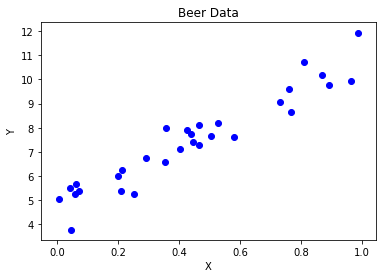

In [2128]:
plt.scatter(df_beer['x'],df_beer['y'],c='blue')
plt.title ('Beer Data')
plt.xlabel('X')
plt.ylabel('Y')

In [2143]:
#df_beer
#del df_beer["Unnamed: 0"]

In [2162]:
df_beer_const= sm.add_constant(df_beer)
df_beer_c=df_beer_const[['const','x']]

In [2163]:
result_q1 = sm.OLS(df_beer['y'],df_beer_c).fit()
result_q1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     276.1
Date:                Sun, 21 Jan 2018   Prob (F-statistic):           4.92e-16
Time:                        15:18:16   Log-Likelihood:                -26.205
No. Observations:                  30   AIC:                             56.41
Df Residuals:                      28   BIC:                             59.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7308      0.197     23.960      0.000       4.326       5.135
x              6.2015      0.373     16.616      0.000       5.437       6.966
==============================================================================
Omnibus:                        0.216   Durbin-Watson:                   2.346
Prob(Omnibus):                  0.897   Jarque-Bera (JB):                0.384
Skew:                          -0.158   Prob(JB):                        0.825
Kurtosis:                       2.544   Cond. No.                         4.12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# The OLS regression method assumes that the noise is normally distributed

In [2165]:
result_q1.params

const    4.730776
x        6.201498
dtype: float64

In [2169]:
def cost_f(b, df_beer_c, df_beer_y, nu=5):
    err= df_beer_y-np.dot(df_beer_c, b)   
    return(np.sum(-np.log(t.pdf(err, nu))))

In [2172]:
x = np.linspace(0,1,100)
c_f = lambda x : cost_f(x, df_beer_c,df_beer['y'])
chosen_b = minimize(c_f, result_q1.params, tol=1e-6)
student_t = chosen_b.x[0] + x*chosen_b.x[1]
#OLS regression
ols_y=result_q1.params[0]+x*result_q1.params[1]

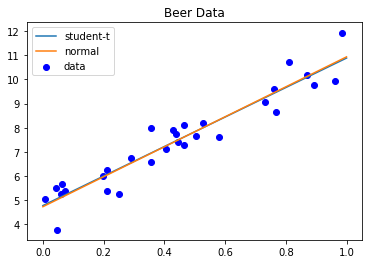

In [2178]:
plt.scatter(df_beer['x'],df_beer['y'],c='blue',label='data')
plt.plot(x,student_t,label='student-t')
plt.plot(x,ols_y,label='normal')
plt.title ('Beer Data')
plt.legend()

In [ ]:
# Both modeled lines are similar, since the students-t is quite similar to normal.

## Question 2 (continued from HW2) 

Read sections 1 and 2 of this [paper](https://www.researchgate.net/profile/Roberto_Togneri/publication/45094554_Linear_Regression_for_Face_Recognition/links/09e4150d243bd8b987000000/Linear-Regression-for-Face-Recognition.pdf). 

Briefly, the model leverages the concept that "patterns from a single-object class lie on a linear subspace."   It also makes use of the idea of linear regression as a problem about projections.  In this case, given a vector $y$, the goal is to find the subspace induced by $\mathrm{Col} \, \mathbf X$ that produced the 'closest' projection vector $\widehat y$ to the original $y$.  

### Question 2a

As discussed in the paper, our face dataset contains cleaned images of faces belonging to different people. Assuming that patterns (faces) from one class (person) are elements of the same subspace, let's try to classify an unknown face using the method presented in the paper.  For each class $i$, we need to:

1. construct the $\mathbf H_i$ hat matrix from known faces, being careful to follow the column concatenation step described in the paper to convert an image into its vector representation;
2. calculate the predicted $\widehat y_i$, the closest vector in $\mathrm{Col} \, \mathbf X_i$ to $y$; and
3. calculate the magnitude of the difference vector between $y$ and $\widehat y_i$.

You should then be able to make a classification decision.

**Notes:**
- Use the provided code to download and re-sample the dataset.
- Follow the normalisation step in the paper to ensure the "maximum pixel value is 1".
- Your classifier should have approximately an 80% accuracy.
- Use the image plotting library of matplotlib to display one (or two) correctly classified faces and the known faces.
- Use the image plotting library of matplotlib to display one (or two) incorrectly classified faces and the known faces.
    
### Question 2b - Significant Faces
Select an example of a correctly classified face. Use statsmodels to investigate the most predictive columns (faces) that the model used in this regression:

(i) Which columns (i.e. faces) make the highest contribution to the projection?

(ii) Which columns (i.e. faces) are the least useful in making this projection?

Plot the correctly assigned face, and the two faces from the questions (i) and (ii). What do you notice about these faces?

In [6]:
from io import BytesIO
from zipfile import ZipFile
import urllib
import os

# Note that you may need to run the following command to install Python Image Library (PIL)
#pip install Pillow
from PIL import Image
import numpy as np
from sklearn.cross_validation import train_test_split

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
# starter functions provided to students
def rgb2gray(rgb):
    '''
    function to convert RGB image to gray scale
    accepts 3D numpy array and returns 2D array with same dimensions
    as the first two dimensions of input
    '''
    
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

def fetch_and_read_data(shape=(50,30)):
    
    '''
    Function to download image data, store in a local folder (note this is 18.4mb), only download the data when
    the local folder is not present, read in the images, downsample them to the specified shape (default = (50x30) (rows x cols))
    and finally split them into a four tuple return object.
    
    Returns:
        - 1) training image data (i.e. images that should form the predictor matrix in your solution)
        - 2) training image data labels (i.e. labels from 1 to 50 that identify which face (1) belongs to)
        - 3) testing image data (i.e. data that you should use to try and classify - note this forms the predictor variable in your regression)
        - 4) testing image data labels (i.e. the labels for (3) - this is to allow you to evaluate your model)
    
    ___________________
    Aside:
    If you want to change the sampling dimensions of your data, pass the shape = (x,y) argument to the method where
    y is the number of columns and x is the number of rows in the image.
    '''
    
    if not os.path.exists('./cropped_faces'):
        url = urllib.request.urlopen("http://www.anefian.com/research/GTdb_crop.zip")
        
        zipfile = ZipFile(BytesIO(url.read()))
        zipfile.extractall()
     
    data = []
    labels = []
    
    files = os.listdir('cropped_faces')
    for f in files:
        if '.jpg' in f:
            image = Image.open('cropped_faces/' + f)
            image = image.resize((shape[1], shape[0]))
            data.append(rgb2gray(np.asarray(image)))
            labels.append(int(f.split('_')[0][1:]) - 1)
            
    data = np.array(data)
    
    trainX, testX, trainY, testY = train_test_split(data, labels, test_size=0.2, stratify=labels)
    return np.array(trainX), np.array(testX), np.array(trainY), np.array(testY)

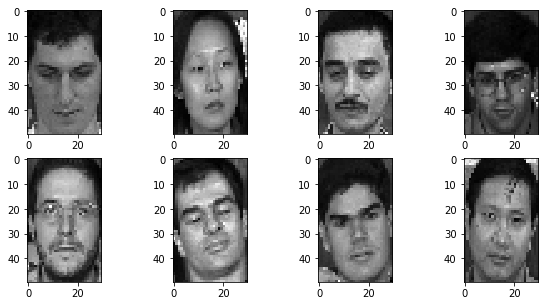

In [8]:
# starter code for the students
train_dataset, test_dataset, train_labels, test_labels = fetch_and_read_data()

# code to plot some of the images
fig, axes = plt.subplots(2,4,figsize=(10,5))
axes = axes.flatten()
[axes[i].imshow(train_dataset[i], cmap='gray') for i in range(len(axes))]
plt.show()